# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Khor**  <br/>
Firstname: **Jia Shin**    <br/>
Student ID: **32356595**    <br/>
Email: **jkho0037@student.monash.edu**    <br/>
Your tutorial time: **Friday 12pm to 2pm**    <br/>
***

## Section 2: Coding Questions

This section consists of coding questions. The total mark for this section is **85**. 
The task we are considering in this section is the text classification task. In this section, some code has been provided to help you get started. For each cell marked with **# Insert your code here**, these are placeholders where you **must** supply your own codes when instructed.
This section consists of 5 parts:
* Part 0: Downloading and preprocessing data. This part has been completed. No marks are allocated for this part.
* Part 1: Coding assessment on using Word2Vect to transform texts to vectors (20 marks).
* Part 2: Coding assessment on Text CNN for sequence modeling and neural embedding (10 marks).
* Part 3: Coding assessment on RNNs for sequence modeling and neural embedding (32 marks).
* Part 4: Coding assessment on Transformer for sequence modeling and neural embedding and the overall ranking (23 marks).

## <span style="color:#0b486b">Set random seeds</span>

We start with importing tensorflow and numpy and setting random seeds for TF and numpy. You can use any seeds you prefer.

In [1]:
import numpy as np
import tensorflow as tf

tf.random.set_seed(6789)
np.random.seed(6789)

## <span style="color:#0b486b">Part 0: Download and preprocess the data</span>

<div style="text-align: right"><span style="color:red; font-weight:bold"><span></div>

The dataset we use for this assignment is a question classification dataset for which the training set consists of $5,500$ questions belonging to 6 coarse question categories including:
- abbreviation (ABBR), 
- entity (ENTY), 
- description (DESC), 
- human (HUM), 
- location (LOC) and 
- numeric (NUM).

In this assignment, we will utilize a subset of this dataset, containing $2,000$ questions for training and validation. We will use 80% of those 2000 questions for trainning and the rest for validation.


Preprocessing data is a crucial initial step in any machine learning or deep learning project. The *TextDataManager* class simplifies the process by providing functionalities to download and preprocess data specifically designed for the subsequent questions in this assignment. It is highly recommended to gain a comprehensive understanding of the class's functionality by **carefully reading** the content provided in the *TextDataManager.py* file before proceeding to answer the questions in Part 1.

In [2]:
from TextDataManager import SimpleTextDataset as DataManager

print('Loading data...')
DataManager.maybe_download("data", "train_2000.label", "http://cogcomp.org/Data/QA/QC/")

dm = DataManager(maxlen=100)
dm.read_data("data/", ["train_2000.label"])

Loading data...
Downloaded successfully train_2000.label

Sample questions and corresponding labels... 

['manner how did serfdom develop in and then leave russia ?', 'cremat what films featured the character popeye doyle ?', "manner how can i find a list of celebrities ' real names ?", 'animal what fowl grabs the spotlight after the chinese year of the monkey ?', 'exp what is the full form of .com ?']
['DESC', 'ENTY', 'DESC', 'ENTY', 'ABBR']


In [3]:
dm.manipulate_data()
dm.train_valid_split(train_ratio=0.8)

In [4]:
print(dm.train_str_questions)
print(dm.train_numeral_data.shape)  
print(dm.valid_numeral_data.shape)  
print(dm.train_numeral_labels.shape)

['manner how did serfdom develop in and then leave russia ?', 'cremat what films featured the character popeye doyle ?', "manner how can i find a list of celebrities ' real names ?", 'animal what fowl grabs the spotlight after the chinese year of the monkey ?', 'exp what is the full form of .com ?', 'ind what contemptible scoundrel stole the cork from my lunch ?', "gr what team did baseball 's st. louis browns become ?", 'title what is the oldest profession ?', 'def what are liver enzymes ?', 'ind name the scar-faced bounty hunter of the old west .', 'date when was ozzy osbourne born ?', 'reason why do heavier objects travel downhill faster ?', 'ind who was the pride of the yankees ?', 'ind who killed gandhi ?', 'event what is considered the costliest disaster the insurance industry has ever faced ?', 'state what sprawling u.s. state boasts the most airports ?', 'desc what did the only repealed amendment to the u.s. constitution deal with ?', 'count how many jews were executed in conce

You now have a data manager, named *dm* containing the training and validiation sets in both text and numeric forms. Your task is to play around and read this code to figure out the meanings of some important attributes that will be used in the next parts.

## <span style="color:#0b486b">Part 1: Using Word2Vect to transform texts to vectors </span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 20 marks]<span></div>

In this part, you will be assessed on how to use a pretrained Word2Vect model for realizing a machine learning task. Basically, you will use this pretrained Word2Vect to transform the questions in the above dataset stored in the *data manager object dm* to numeric form for training a classifier using Logistic Regression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [5]:
import gensim.downloader as api
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy as np

#### <span style="color:red">**Question 1.1**</span> 
**Write code to download the pretrained model *glove-wiki-gigaword-100*. Note that this model transforms a word in its dictionary to a $100$ dimensional vector.**

**Write code for the function *get_word_vector(word, model)* used to transform a word to a vector using the pretrained Word2Vect model *model*. Note that for a word not in the vocabulary of our *word2vect*, you need to return a vector $0$ with 100 dimensions.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div> 

In [6]:
word2vect = api.load("glove-wiki-gigaword-100")# Insert your code here

In [7]:
def get_word_vector(word, model):
    try:
        vector = model.get_vector(word) # Insert your code here
    except: # word not in the vocabulary
        vector = np.zeros(100)# Insert your code here
    return vector

#### <span style="color:red">**Question 1.2**</span> 

**Write the code for the function `get_sentence_vector(sentence, important_score=None, model= None)`. Note that this function will transform a sentence to a 100-dimensional vector using the pretrained model *model*. In addition, the list *important_score* which has the same length as the *sentence* specifies the important scores of the words in the sentence. In your code, you first need to apply *softmax* function over *important_score* to obtain the important weight *important_weight* which forms a probability over the words of the sentence. Furthermore, the final vector of the sentence will be weighted sum of the individual vectors for words and the weights in *important_weight*.**
- $important\_weight = softmax(important\_score)$.
- $final\_vector= important\_weight[1]\times v[1] + important\_weight[2]\times v[2] + ...+ important\_weight[T]\times v[T]$ where $T$ is the length of the sentence and $v[i]$ is the vector representation of the $i-th$  word in this sentence.

**Note that if `important_score=None` is set by default, your function should return the average of all representation vectors corresponding to set `important_score=[1,1,...,1]`.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div> 

In [8]:
def get_sentence_vector(sentence, important_score=None, model=None):
    # Insert your code here
    words = sentence.split()
    word_vectors = np.array([get_word_vector(word, model) for word in words])
    
    if important_score == None:
        return word_vectors.mean(axis = 0)
    else:
        important_weight = tf.nn.softmax(important_score).numpy()
        return np.sum(word_vectors * important_weight, axis = 0)

#### <span style="color:red">**Question 1.3**</span> 

**Write code to transform questions in *dm.train_str_questions* and *dm.valid_str_questions* to feature vectors. Note that after running the following cells, you must have $X\_train$ and $X\_valid$ which are two numpy arrays of the feature vectors and $y\_train$ and $y\_valid$ which are two arrays of numeric labels (Hint: *dm.train_numeral_labels* and *dm.valid_numeral_labels*). You can add more lines to the following cells if necessary. In addition, you should decide the *important_score* by yourself. For example, you might reckon that the 1st score is 1, the 2nd score is decayed by 0.9, the 3rd is decayed by 0.9, and so on.**

<div style="text-align: right"><span style="color:red">[4 marks]</span></div> 

In [9]:
important_score = [0.9**i for i in range(100)]

In [10]:
print("Transform training set to feature vectors...")
X_train = np.array([get_sentence_vector(questions, important_score, word2vect) for questions in dm.train_str_questions])# Insert your code here
y_train = np.array(dm.train_numeral_labels)# Insert your code here

Transform training set to feature vectors...


In [11]:
print("Transform validation set to feature vectors...")
X_valid = np.array([get_sentence_vector(questions, important_score, word2vect) for questions in dm.valid_str_questions])# Insert your code here
y_valid = np.array(dm.valid_numeral_labels)# Insert your code here

Transform validation set to feature vectors...


#### <span style="color:red">**Question 1.4**</span> 

**It is now to use *MinMaxScaler(feature_range=(-1,1))* in scikit-learn to scale both training and validation sets to the range $(-1,1)$.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div> 

In [12]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)# Insert your code here
scaler.fit(X_valid)
X_valid = scaler.transform(X_valid)# Insert your code here

#### <span style="color:red">**Question 1.5**</span>
**Train a Logistic Regression model on the training set and then evaluate on the validation set.**
<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
# Insert your code for training here
regression_model = LogisticRegression(max_iter = 500)
regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [18]:
# Insert your code for validation here
predictions = regression_model.predict(X_valid)
print("The accuracy score for the validation dataset is " + str(accuracy_score(y_valid, predictions)))

The accuracy score for the validation dataset is 0.7825


### **Embedding visualization**

**As you know, the embedding matrix is a collection of embedding vectors, each is for one word. In this part, you will base on the cosine similarity of the embedding vectors for the words to find the top-k most relevant words for a given word.**

**Good embeddings should have words close in meaning near each other by some similarity metrics. The similarity metric we'll use is the `consine` similarity, which is defined for two vector $\mathbf{u}$ and $\mathbf{v}$ as $\cos(\mathbf{u}, \mathbf{v})=\frac{\mathbf{u} \cdot \mathbf{v}}{\left\Vert{\mathbf{u}}\right\Vert\left\Vert{\mathbf{v}}\right\Vert}$ where $\cdot$ means dot product and $\left\Vert\cdot\right\Vert$ means the $L^2$ norm.**

In [13]:
def cosine_similarity(u,v):
    return np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

#### <span style="color:red">**Question 1.6** </span> 

**Write code for the `function find_most_similar(word=None, k=5, model=None)` which returns a list of the top-`k` most similar words (in descending order) for a given word. This similarity is based on the cosine similarity of embedding vectors obtained from the pretrained model `glove-wiki-gigaword-100` (see Question 1.1). The parameter `include_cur_word` specifies whether the given word should be included in the returned output or not. This means that if `include_cur_word=True`, the function will return `k+1` words.** 

<div style="text-align: right"><span style="color:red">[3 marks]</span></div>

In [14]:
def find_most_similar(word=None, k=5, model=None, include_cur_word=False):
    try:
        lst = model.similar_by_word(word, k)
        
        complete_lst = []
        if include_cur_word == True:
            word_vec = model.get_vector(word)
            complete_lst.append([word, cosine_similarity(word_vec, word_vec), word_vec])
            
        for i in range(len(lst)):
            complete_lst.append([lst[i][0], lst[i][1], model.get_vector(lst[i][0])])

        return [[elem[0] for elem in complete_lst], [elem[1] for elem in complete_lst], [elem[2] for elem in complete_lst]]
    except: # Word not in the vocabulary
        print("Word is not in the dictionary!")

Here is the example of the above function. You can check your implementation using the provided `result`. As you can observe, the `result` makes sense which demonstrates that the embedding matrix is meaningful.

In [15]:
result = ['computer','computers','software','technology','pc','hardware','internet','desktop','electronic','systems','computing']
output = find_most_similar(word='computer', k=10, model=word2vect, include_cur_word=True)[0]
if output == result:
    print("Your implementation is correct.")
else:
    print("Your implementation is not correct.")

Your implementation is correct.


#### <span style="color:red">**Question 1.7** </span> 
**Implement the `plot2D_with_groups(word_list, model, k=10)` function to visualize groups of similar words in 2D space. The `word_list` parameter is a list of words, and for each word in the `word_list`, find its top-`k` most similar words (which forms a group) using the `find_most_similar` function. Use tSNE to project embedding vectors into 2D space and plot groups with different colors. You can use the colormaps from `matplotlib`, i.e., `cmap = plt.get_cmap('brg')`.**

**The figure bellow is the output obtained by running `plot2D_with_groups` using the input `word_list=['an', 'introduction', 'to', 'deep', 'learning']`. Note that the words within the `word_list` are also visualized (in black) as shown in the figure.**

<img src="./images/2Dtsne.png" align="center" width=600/>

**As you can observe, words within each group tend to be closer to each other, while words from different groups are more distant.**

<div style="text-align: right"><span style="color:red">[5 marks]</span></div>

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000)

#Code is adapted from tutorial 8
def plot2D_with_groups(word_list=None, k=10, model=None):
   # Insert your code here
    plt.figure(figsize = (20, 20))
    words_to_plot = []
    colors_to_plot = []
    color_index = 0
    colors = ['b', 'g', 'r', 'c', 'm']
    
    for word in word_list:
        similar_words = find_most_similar(word = word, k = k, model = model, include_cur_word = True)[0]
        for similar_word in similar_words:
            words_to_plot.append(similar_word)
            colors_to_plot.append(colors[color_index])
        color_index += 1
    
    embeddings = np.array([model.get_vector(word) for word in words_to_plot])
    low_dim_embs = tsne.fit_transform(embeddings)
    
    for i, label in enumerate(words_to_plot):
        x, y = low_dim_embs[i,:]
        if label in word_list:
            appropriate_color = 'black'
        else:
            appropriate_color = colors_to_plot[i]
        plt.scatter(x, y, color = appropriate_color)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                     color = appropriate_color)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

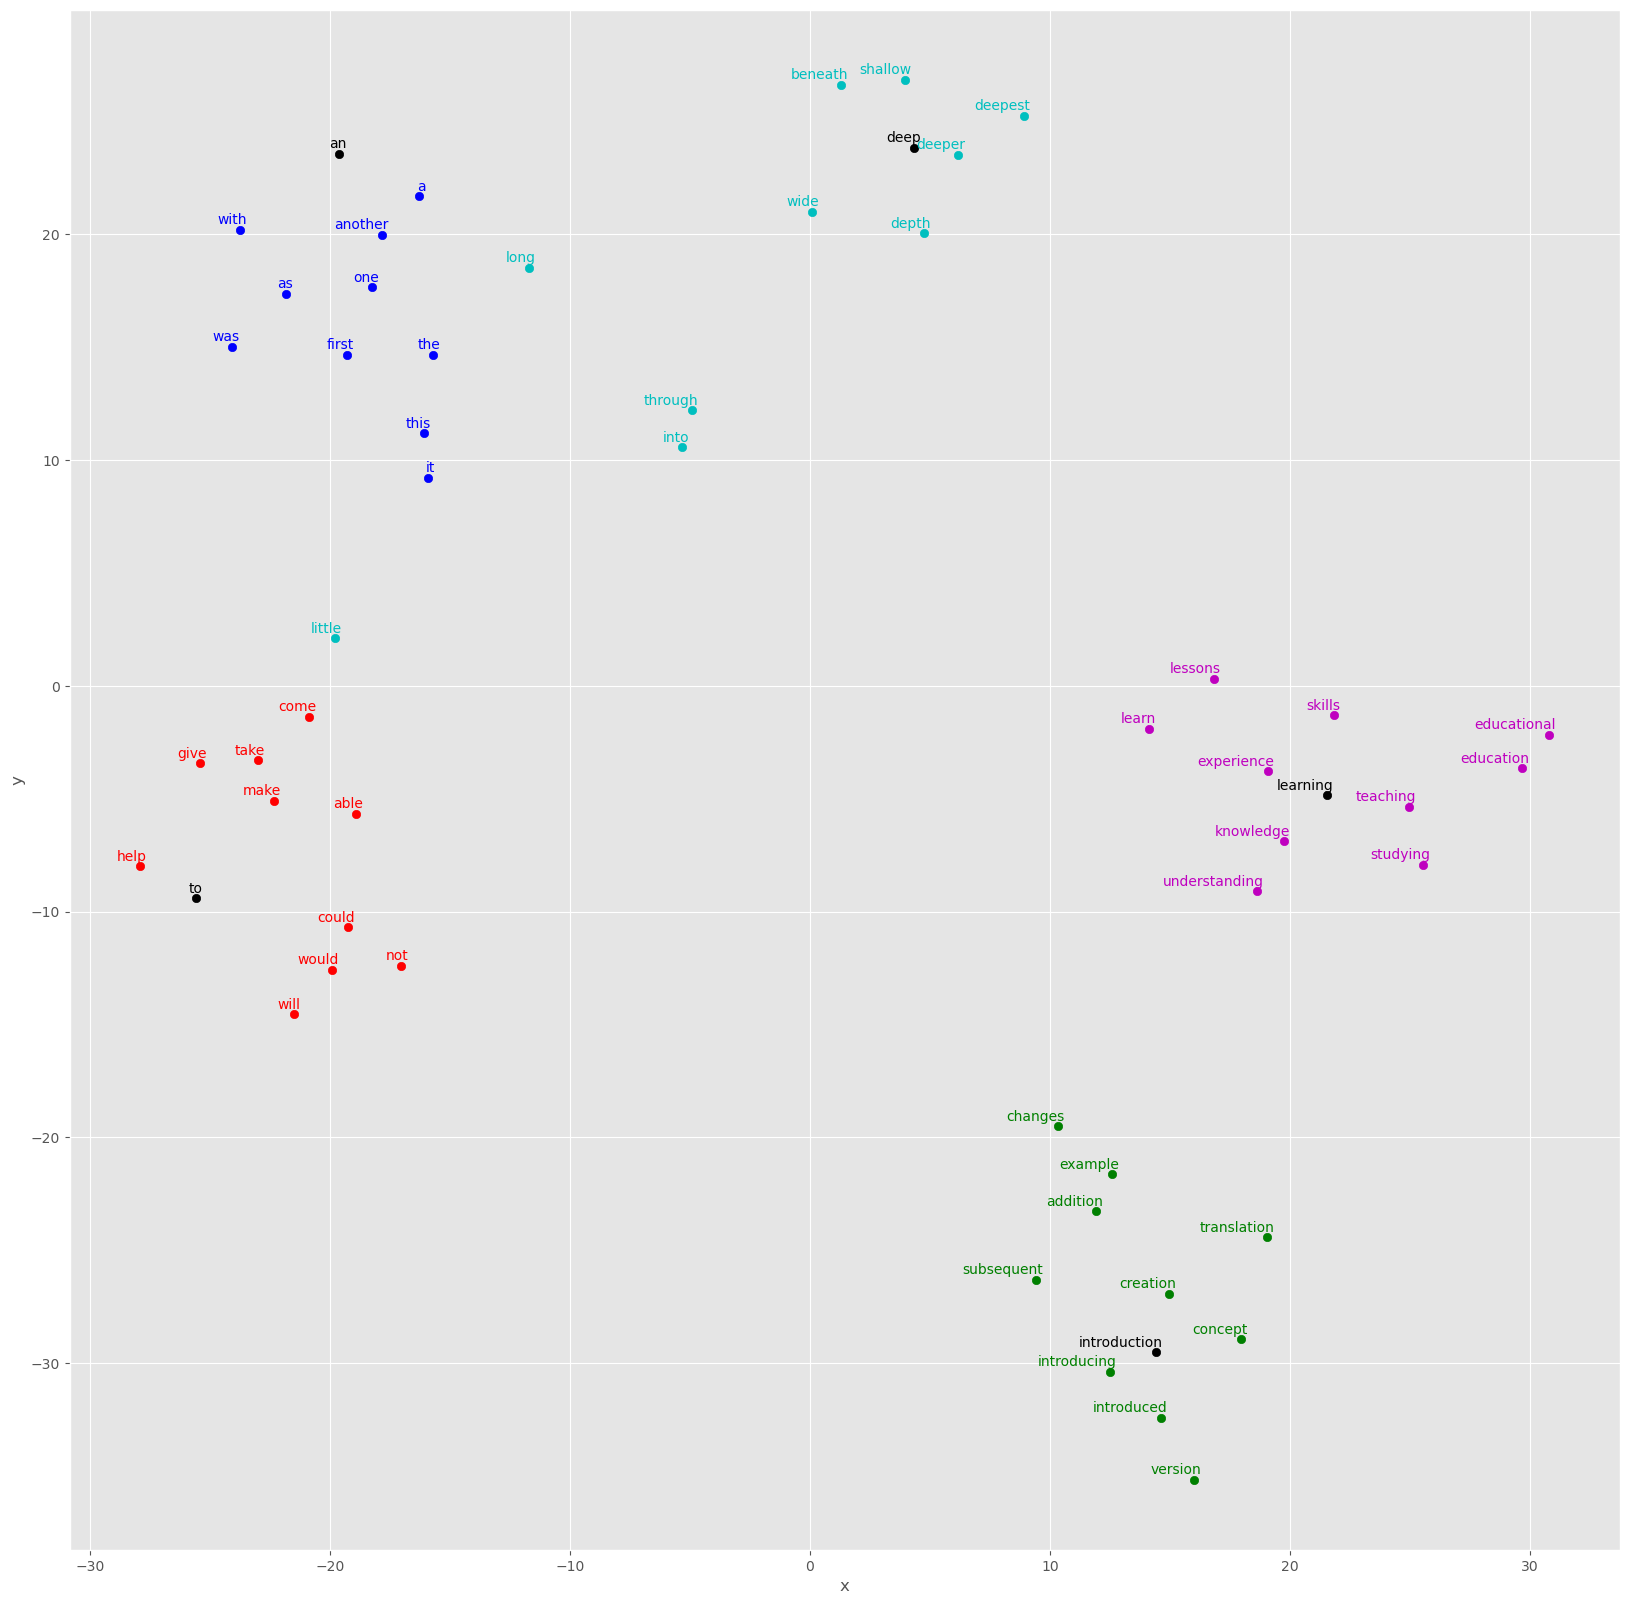

In [17]:
word_list = ['an', 'introduction', 'to', 'deep', 'learning']
plot2D_with_groups(word_list=word_list, k=10, model=word2vect)

## <span style="color:#0b486b">Part 2: Text CNN for sequence modeling and neural embedding </span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 10 marks]<span></div>

#### <span style="color:red">**Question 2.1**</span> 

**In what follows, you are required to complete the code for Text CNN for sentence classification. The paper of Text CNN can be found at this [link](https://www.aclweb.org/anthology/D14-1181.pdf). Here is the description of the Text CNN that you need to construct.**
- There are three attributes (properties or instance variables): *embed_size, state_size, data_manager*.
  - `embed_size`: the dimension of the vector space for which the words are embedded to using the embedding matrix.
  - `state_size`: the number of filters used in *Conv1D* (reference [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D)).
  - `data_manager`: the data manager to store information of the dataset.
- The detail of the computational process is as follows:
  - Given input $x$, we embed $x$ using the embedding matrix to obtain an $3D$ tensor $[batch\_size \times maxlen \times embed\_size]$ as $h$.
  - We feed $h$ to three *Conv1D* layers, each of which has $state\_size$ filters, padding=same, activation= relu, and $kernel\_size= 3, 5, 7$ respectively to obtain $h1, h2, h3$. Note that each $h1, h2, h3$ is a 3D tensor with the shape $[batch\_size \times output\_size \times state\_size]$.
  - We then apply *GlobalMaxPool1D()* (reference [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool1D)) over $h1, h2, h3$ to obtain 2D tensors stored in $h1, h2, h3$ again.
  - We then concatenate three 2D tensors $h1, h2, h3$ to obtain $h$. Note that you need to specify the axis to concatenate.
  - We finally build up one dense layer on the top of $h$ for classification.
  
  <div style="text-align: right"><span style="color:red">[8 marks]</span></div>
  

In [100]:
class TextCNN:
    def __init__(self, embed_size= 128, state_size=16, data_manager=None):
        self.data_manager = data_manager
        self.embed_size = embed_size
        self.state_size = state_size
    
    def build(self):
        x = tf.keras.layers.Input(shape=[None])
        h = tf.keras.layers.Embedding(self.data_manager.vocab_size +1, self.embed_size, mask_zero=True)(x)
        h1 = tf.keras.layers.Conv1D(filters = self.state_size, padding = "same", activation = "relu", kernel_size = 3)(h)# Insert your code here
        h2 = tf.keras.layers.Conv1D(filters = self.state_size, padding = "same", activation = "relu", kernel_size = 5)(h)# Insert your code here
        h3 = tf.keras.layers.Conv1D(filters = self.state_size, padding = "same", activation = "relu", kernel_size = 7)(h)# Insert your code here
        h1 = tf.keras.layers.GlobalMaxPooling1D()(h1)# Insert your code here
        h2 = tf.keras.layers.GlobalMaxPooling1D()(h2)# Insert your code here
        h3 = tf.keras.layers.GlobalMaxPooling1D()(h3)# Insert your code here
        h = tf.keras.layers.Concatenate(axis = 1)([h1, h2, h3])# Insert your code here
        h = tf.keras.layers.Dense(self.data_manager.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h) 
    
    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)
    
    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)
    
    def evaluate(self, *args, **kwargs):
        self.model.evaluate(*args, **kwargs)

#### <span style="color:red">**Question 2.2**</span> 
**Here is the code to test TextCNN above. You can observe that TextCNN outperforms the traditional approach Word2Vect with Logistic Regression for this task. The reason is that TextCNN enables us to automatically learn the feature that fits to the task. This makes deep learning different from hand-crafted feature approaches. Complete the code to test the model. Note that when compiling the model, you can use the Adam optimizer.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [101]:
text_cnn = TextCNN(data_manager=dm)
text_cnn.build()
# Insert your code here 
# You are required to compile the model and train the model on 20 epochs
text_cnn.compile_model(optimizer = "adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
text_cnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64))

Epoch 1/20
25/25 [==============================] - 3s 61ms/step - loss: 1.6839 - accuracy: 0.3444 - val_loss: 1.5255 - val_accuracy: 0.5000
Epoch 2/20
25/25 [==============================] - 1s 54ms/step - loss: 1.2576 - accuracy: 0.7175 - val_loss: 1.0139 - val_accuracy: 0.8500
Epoch 3/20
25/25 [==============================] - 1s 54ms/step - loss: 0.6855 - accuracy: 0.9056 - val_loss: 0.4879 - val_accuracy: 0.9225
Epoch 4/20
25/25 [==============================] - 1s 52ms/step - loss: 0.2999 - accuracy: 0.9500 - val_loss: 0.2515 - val_accuracy: 0.9550
Epoch 5/20
25/25 [==============================] - 1s 57ms/step - loss: 0.1495 - accuracy: 0.9681 - val_loss: 0.1705 - val_accuracy: 0.9550
Epoch 6/20
25/25 [==============================] - 1s 51ms/step - loss: 0.0857 - accuracy: 0.9887 - val_loss: 0.1330 - val_accuracy: 0.9650
Epoch 7/20
25/25 [==============================] - 2s 62ms/step - loss: 0.0526 - accuracy: 0.9975 - val_loss: 0.1133 - val_accuracy: 0.9675
Epoch 8/20
25

## <span style="color:#0b486b">Part 3: RNN-based models for sequence modeling and neural embedding</span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 32 marks]<span></div>

### <span style="color:#0b486b">3.1. RNNs with different cell types</span> ###

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 12 marks]<span></div>

#### <span style="color:red">**Question 3.1.1**</span> 
**In this part, you need to construct a vanilla RNN to learn from the dataset of interest. Basically, you are required to construct the class RNN with the following requirements:**
- Attribute `data_manager (self.data_manager)`: specifies the data manager used to store data for the model.
- Attribute `cell_type (self.cell_type)`: can take one of the three values, i.e., `simple_rnn`, `gru`, or `lstm` which specifies the memory cells formed a hidden layer.
- `state_sizes (self.state_sizes)` indicates the list of the hidden sizes  of memory cells. For example, $state\_sizes = [64, 128]$ means that you have two hidden layers in your network with hidden sizes of $64$ and $128$ respectively.

**Note that when declaring an embedding layer for the network, you need to set *mask_zero=True* so that the padding zeros in the sentences will be masked and ignored. This helps to have variable length RNNs. For more detail, you can refer to this [link](https://www.tensorflow.org/guide/keras/masking_and_padding).**

<div style="text-align: right"><span style="color:red">[7 marks]</span></div>

In [104]:
class BaseRNN:
    def __init__(self, cell_type='gru', embed_size=128, state_sizes=[128, 64], data_manager=None):
        self.cell_type = cell_type
        self.state_sizes = state_sizes
        self.embed_size = embed_size
        self.data_manager = data_manager
        self.vocab_size = self.data_manager.vocab_size + 1 
        
    # return the corresponding memory cell
    @staticmethod
    def get_layer(cell_type='gru', state_size=128, return_sequences=False, activation='tanh'):
        if cell_type == 'gru':
            return tf.keras.layers.GRU(units = state_size, return_sequences = return_sequences, activation = activation)# Insert your code here
        elif cell_type == 'lstm':
            return tf.keras.layers.LSTM(units = state_size, return_sequences = return_sequences, activation = activation)# Insert your code here
        else:
            return tf.keras.layers.SimpleRNN(units = state_size, return_sequences = return_sequences, activation = activation)# Insert your code here
    
    def build(self):
        x = tf.keras.layers.Input(shape=[None])
        h = tf.keras.layers.Embedding(input_dim = self.vocab_size, output_dim = self.embed_size, mask_zero = True)(x)# Insert your code here
        num_layers = len(self.state_sizes)# Insert your code here
        for i in range(num_layers-1):
            h =  self.get_layer(self.cell_type, self.state_sizes[i], return_sequences = True)(h)# Insert your code here, you can insert more lines if necessary
        #Only need the last hidden state output for the last layer
        h = self.get_layer(self.cell_type, self.state_sizes[-1], return_sequences = False)(h)
        h = tf.keras.layers.Dense(dm.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h)
   
    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)
    
    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)
    
    def evaluate(self, *args, **kwargs):
        self.model.evaluate(*args, **kwargs)       


#### <span style="color:red">**Question 3.1.2**</span> 
**Run with simple RNN ('simple_rnn') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 mark]</span></div>

In [105]:
base_rnn = BaseRNN("simple_rnn", 128, [64, 128], dm)# Insert your code here
base_rnn.build()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
base_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64))

Epoch 1/20
25/25 [==============================] - 4s 86ms/step - loss: 0.8789 - accuracy: 0.6969 - val_loss: 0.2666 - val_accuracy: 0.9375
Epoch 2/20
25/25 [==============================] - 2s 80ms/step - loss: 0.1727 - accuracy: 0.9531 - val_loss: 0.1717 - val_accuracy: 0.9450
Epoch 3/20
25/25 [==============================] - 2s 82ms/step - loss: 0.0924 - accuracy: 0.9744 - val_loss: 0.1391 - val_accuracy: 0.9625
Epoch 4/20
25/25 [==============================] - 2s 88ms/step - loss: 0.0906 - accuracy: 0.9794 - val_loss: 0.2291 - val_accuracy: 0.9325
Epoch 5/20
25/25 [==============================] - 2s 79ms/step - loss: 0.0345 - accuracy: 0.9900 - val_loss: 0.1139 - val_accuracy: 0.9650
Epoch 6/20
25/25 [==============================] - 2s 81ms/step - loss: 0.0563 - accuracy: 0.9856 - val_loss: 0.1272 - val_accuracy: 0.9675
Epoch 7/20
25/25 [==============================] - 2s 83ms/step - loss: 0.0179 - accuracy: 0.9962 - val_loss: 0.1219 - val_accuracy: 0.9650
Epoch 8/20
25

#### <span style="color:red">**Question 3.1.3**</span> 
**Run with GRU ('gru') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 mark]</span></div>

In [106]:
base_rnn = BaseRNN("gru", 128, [64, 128], dm)# Insert your code here
base_rnn.build()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
base_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64))

Epoch 1/20
25/25 [==============================] - 12s 252ms/step - loss: 1.6751 - accuracy: 0.2581 - val_loss: 1.5880 - val_accuracy: 0.3475
Epoch 2/20
25/25 [==============================] - 4s 157ms/step - loss: 1.2328 - accuracy: 0.4837 - val_loss: 0.8684 - val_accuracy: 0.6600
Epoch 3/20
25/25 [==============================] - 4s 155ms/step - loss: 0.5115 - accuracy: 0.8338 - val_loss: 0.2681 - val_accuracy: 0.9325
Epoch 4/20
25/25 [==============================] - 4s 162ms/step - loss: 0.1803 - accuracy: 0.9500 - val_loss: 0.1866 - val_accuracy: 0.9350
Epoch 5/20
25/25 [==============================] - 4s 170ms/step - loss: 0.0779 - accuracy: 0.9794 - val_loss: 0.1231 - val_accuracy: 0.9550
Epoch 6/20
25/25 [==============================] - 4s 166ms/step - loss: 0.0325 - accuracy: 0.9919 - val_loss: 0.1131 - val_accuracy: 0.9525
Epoch 7/20
25/25 [==============================] - 4s 159ms/step - loss: 0.0260 - accuracy: 0.9931 - val_loss: 0.1521 - val_accuracy: 0.9525
Epoch

#### <span style="color:red">**Question 3.1.4**</span> 
**Run with LSTM ('lstm') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 mark]</span></div>

In [107]:
base_rnn = BaseRNN("lstm", 128, [64, 128], dm)# Insert your code here
base_rnn.build()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
base_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64))

Epoch 1/20
25/25 [==============================] - 14s 276ms/step - loss: 1.6550 - accuracy: 0.2937 - val_loss: 1.3678 - val_accuracy: 0.4925
Epoch 2/20
25/25 [==============================] - 5s 190ms/step - loss: 0.9570 - accuracy: 0.6069 - val_loss: 0.6841 - val_accuracy: 0.6700
Epoch 3/20
25/25 [==============================] - 6s 241ms/step - loss: 0.5666 - accuracy: 0.7781 - val_loss: 0.3484 - val_accuracy: 0.9150
Epoch 4/20
25/25 [==============================] - 6s 252ms/step - loss: 0.2609 - accuracy: 0.9362 - val_loss: 0.2537 - val_accuracy: 0.9225
Epoch 5/20
25/25 [==============================] - 6s 223ms/step - loss: 0.1543 - accuracy: 0.9569 - val_loss: 0.1883 - val_accuracy: 0.9450
Epoch 6/20
25/25 [==============================] - 6s 237ms/step - loss: 0.1229 - accuracy: 0.9681 - val_loss: 0.1870 - val_accuracy: 0.9450
Epoch 7/20
25/25 [==============================] - 6s 233ms/step - loss: 0.0723 - accuracy: 0.9844 - val_loss: 0.3224 - val_accuracy: 0.8975
Epoch

#### <span style="color:red">**Question 3.1.5**</span> 
**Write code to conduct experiments to compare the accuracies of RNNs with the three different cell types using 2 different lists of `state_sizes` (while the other hyperparameters are fixed). Specifically, for each `state_sizes = [...]`, you should report the accuracies of RNNs with simple RNN ('simple_rnn') cell, GRU ('gru') cell, and LSTM ('lstm') cell. Give your comments on the results.**
<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [111]:
# Insert your code here
cell_types_list = ["simple_rnn", "gru", "lstm"]
#Using the state sizes suggested on ED
state_sizes_list = [[64, 128], [30, 50]]

for cell_types in cell_types_list:
    for state_sizes in state_sizes_list:
        print("Cell type = " + cell_types)
        print("State size = " + str(state_sizes))
        base_rnn = BaseRNN(cell_types , 128, state_sizes, dm)
        base_rnn.build()
        opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
        base_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = base_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), verbose = False)
        print("Training Accuracy = " + str(history.history["accuracy"][-1]))
        print("Validation Accuracy = " + str(history.history["val_accuracy"][-1]))
        print("\n")

Cell type = simple_rnn
State size = [64, 128]
Training Accuracy = 1.0
Validation Accuracy = 0.9700000286102295


Cell type = simple_rnn
State size = [30, 50]
Training Accuracy = 1.0
Validation Accuracy = 0.9549999833106995


Cell type = gru
State size = [64, 128]
Training Accuracy = 1.0
Validation Accuracy = 0.9524999856948853


Cell type = gru
State size = [30, 50]
Training Accuracy = 1.0
Validation Accuracy = 0.9449999928474426


Cell type = lstm
State size = [64, 128]
Training Accuracy = 1.0
Validation Accuracy = 0.9674999713897705


Cell type = lstm
State size = [30, 50]
Training Accuracy = 1.0
Validation Accuracy = 0.9574999809265137




All 6 models gave a perfect training accuracy of 1. For this assignment, as we are mainly using the validation data as our test set, we will be focusing more on the validation accuracy.  
For the Simple RNNs, GRUs and LSTMs, it can be seen that the validation accuracy decreases when the state sizes decreases. This could be due to the loss of training capacity, as this means the model now has fewer parameters, which will reduce the model's capability to learn complex pattern and relationships within the data.  
Additionally, it can be observed that the average validation accuracies for the Simple RNNs is higher than the average validation accuracies for GRUs and LSTMs. LSTMs and GRUs are better at capturing long-term dependencies, but if the sequences that we are working with is relatively small, which could be the case due to the short sentences within the training set, then the Simple RNNs could work better due to less likely chances of overfitting.

### <span style="color:#0b486b">3.2. RNNs with fine-tuning embedding matrix</span> ###

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 8 marks]<span></div>

#### <span style="color:red">**Question 3.2.1**</span> 

**In what follows, you are required to extend the class BaseRNN in Part 3.1 to achieve a class RNN in which the embedding matrix can be initialized using a pretrained Word2Vect.**

**Below are the descriptions of the attributes of the class *RNN*:**
- `run_mode (self.run_mode)` has three values (scratch, init-only, and init-fine-tune).
  - `scratch` means training the embedding matrix from scratch.
  - `init-only` means only initializing the embedding matrix with a pretrained Word2Vect but **not further doing** fine-tuning that matrix.
  - `init-fine-tune` means both initializing the embedding matrix with a pretrained Word2Vect and **further doing** fine-tuning that matrix.
- `cell_type (self.cell_type)` has three values (simple-rnn, gru, and lstm) which specify the memory cell used in the network.
- `embed_model (self.embed_model)` specifes the pretrained Word2Vect model used.
-  `embed_size (self.embed_size)` specifes the embedding size. Note that when run_mode is either 'init-only' or 'init-fine-tune', this embedding size is extracted from embed_model for dimension compatability.
- `state_sizes (self.state_sizes)` indicates the list of the hidden sizes  of memory cells. For example, $state\_sizes = [64, 128]$ means that you have two hidden layers in your network with hidden sizes of $64$ and $128$ respectively.

**Complete the code of the class *RNN*.**

<div style="text-align: right"><span style="color:red">[6 marks]</span></div>

In [122]:
class RNN(BaseRNN):
    def __init__(self, run_mode='scratch', embed_model='glove-wiki-gigaword-100', **kwargs):
        super().__init__(**kwargs)
        self.run_mode = run_mode
        self.embed_model = embed_model
        if self.run_mode != 'scratch':
            self.embed_size = int(self.embed_model.split("-")[-1])
        self.word2idx = dm.word2idx
        self.word2vect = None
        self.embed_matrix = np.zeros(shape=[self.vocab_size, self.embed_size])

    def build_embedding_matrix(self):
        # Insert your code here
        self.word2vect = api.load(self.embed_model)
        try:
            for key in self.word2idx:
                self.embed_matrix[self.word2idx[key]] = self.word2vect.get_vector(key)
        except:
            pass
            

    def build(self):
        # Insert your code here to override the 'build' method of BaseRNN
        x = tf.keras.layers.Input(shape=[None])
    
        #https://stackoverflow.com/questions/53503389/how-to-set-parameters-in-keras-to-be-non-trainable helped me
        if self.run_mode == "scratch":
            h = tf.keras.layers.Embedding(input_dim = self.vocab_size, output_dim = self.embed_size, mask_zero=True, trainable=True)(x)
        elif self.run_mode == "init-only":
            self.build_embedding_matrix()
            h = tf.keras.layers.Embedding(input_dim = self.vocab_size, output_dim = self.embed_size, mask_zero=True, trainable=False, weights = [self.embed_matrix])(x)
        elif self.run_mode == "init-fine-tune":
            self.build_embedding_matrix()
            h = tf.keras.layers.Embedding(input_dim = self.vocab_size, output_dim = self.embed_size, mask_zero=True, trainable=True, weights = [self.embed_matrix])(x)
        else:
            print("Wrong run mode specified!")
            
        num_layers = len(self.state_sizes)# Insert your code here
        for i in range(num_layers-1):
            h =  self.get_layer(self.cell_type, self.state_sizes[i], return_sequences = True)(h)# Insert your code here, you can insert more lines if necessary
        #Only need the last hidden state output for the last layer
        h = self.get_layer(self.cell_type, self.state_sizes[-1], return_sequences = False)(h)
        h = tf.keras.layers.Dense(dm.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h)

    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)

    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)

    def evaluate(self, *args, **kwargs):
        self.model.evaluate(*args, **kwargs)

#### <span style="color:red">**Question 3.2.2**</span> 

**Write code to conduct experiments to compare three running modes for the embedding matrix. Note that you should stick with fixed values for other attributes and only vary *run_mode*. Give your comments on the results.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [123]:
# Insert your code here
running_modes = ["scratch", "init-only", "init-fine-tune"]

for running_mode in running_modes:
    print("Running mode = " + running_mode)
    rnn = RNN(run_mode = running_mode, cell_type = "simple_rnn", data_manager = dm)
    rnn.build()
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), verbose = False)
    print("Training Accuracy = " + str(history.history["accuracy"][-1]))
    print("Validation Accuracy = " + str(history.history["val_accuracy"][-1]))
    print("\n")

Running mode = scratch
Training Accuracy = 1.0
Validation Accuracy = 0.9674999713897705


Running mode = init-only
Training Accuracy = 0.9231250286102295
Validation Accuracy = 0.8100000023841858


Running mode = init-fine-tune
Training Accuracy = 0.9962499737739563
Validation Accuracy = 0.949999988079071




All 3 modes gave a perfect or almost perfect training accuracy. For this assignment, as we are mainly using the validation data as our test set, we will be focusing more on the validation accuracy.  
As we can see, when the running mode is in "scratch" or "init-fine-tune", the validation accuracy is higher compared to using "init-only" as the running mode. This could be due to the fact that creating an embedding matrix from scratch or fine-tuning an embedding matrix from a pretrained Word2Vect allows the model to focus and specialize on the specific characteristics of our dataset, therefore being able to capture patterns and relationships within the data better compared to just using an embedding matrix from a pretrained Word2Vect and not fine-tuning it.

### <span style="color:#0b486b">3.3. RNNs with Attention for Text and Sequence Classification</span> ###

**In what follows, you are required to implement a RNN with the attention mechanism for text and sequence classification. This attention mechanism is applied at the last hidden layer of our RNN. Specifically, let $\textbf{h}_1^L, \textbf{h}_2^L,...,\textbf{h}_{T-1}^L, \textbf{h}_T^L$ be the hidden states at the last hidden layer $L$ where $T$ is the sequence length. We compute the context vector $\textbf{c}$ as $\textbf{c}=\sum_{i=1}^{T}\textbf{a}_{i}\textbf{h}_{i}^L$ where $\textbf{a}_1,...,\textbf{a}_T$ are the alignment weights (i.e., $\textbf{a}_i\geq 0$ and $\sum_{i=1}^{T}\textbf{a}_{i}=1$).**

**The alignment weights are computed as follows:**
- $\textbf{a}=[\textbf{a}_{i}]_{i=1}^{T}=\text{softmax}(\textbf{s})$ where $\textbf{s}= [\textbf{s}_{i}]_{i=1}^{T}$ consists of the alignment scores.
- The alignment scores are computed as $\textbf{s}=\text{tanh}(\textbf{h}^LU)V$ where $\textbf{h}^L=\left[\begin{array}{c}
\textbf{h}_{1}^L\\
\textbf{h}_{2}^L\\
...\\
\textbf{h}_{T-1}^L\\
\textbf{h}_{T}^L
\end{array}\right]\in\mathbb{R}^{T\times state\_size_{L}}$, $U\in\mathbb{R}^{state\_size_{L}\times output\_length}$, $V\in\mathbb{R}^{output\_length\times1}$, and $output\_length$ is a hyperparameter. Note that if we consider a mini-batch, the shape of $\textbf{h}^L$ is $(batch\_size, T, state\_size_L)$ where $state\_size_L$ is the hidden size of the last hidden layer. The figure on the right below illustrates the process of calculating a score $\textbf{s}_i$ for an individual hidden state $\textbf{h}_i^L$. Weight matrices $U$ and $V$ are shared across the hidden states $\textbf{h}_1^L,\textbf{h}_2^L,\dots,\textbf{h}_T^L$.

**After having the context vector $\textbf{c}$, we concatenate with the last hidden state $\textbf{h}_T^L$. On top of this concatenation, we conduct the output layer with the softmax activation.**

<img src="./images/attentionRNN.png" align="center" width=700/>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 12 marks]<span></div>

#### <span style="color:red">**Question 3.3.1**</span>

**We declare the  layer `MyAttention` as a class inherited from `tf.keras.layers.Layer` to realize our attention mechanism. You are required to provide the code for this class. Note that in the `def call(self, all_states, last_state)` method, `all_states` is the collection of all hidden states and `last_state` is the last hidden state.**

<div style="text-align: right"><span style="color:red">[4 marks]</span></div>

In [124]:
class MyAttention(tf.keras.layers.Layer):
    def __init__(self, output_length=50):
        super().__init__()
        # Insert your code here
        self.output_length = output_length
        self.U = tf.keras.layers.Dense(output_length)
        self.V = tf.keras.layers.Dense(1)
    
    # all_states is the collection of all hidden states and last_state is the last hidden state
    def call(self, all_states, last_state):
        # Insert your code here
        #Tutorial 9a helped me with this
        alignment_scores = self.V(tf.keras.activations.tanh(self.U(all_states)))
        alignment_weights = tf.linalg.matrix_transpose(tf.nn.softmax(alignment_scores, axis = 1))
        context = tf.reduce_sum(tf.linalg.matmul(alignment_weights, all_states), axis = 1)
        return tf.concat([context, last_state], axis = 1)

#### <span style="color:red">**Question 3.3.2**</span> 

**You are required to extend the class `RNN` in Question `3.2.1` to achieve the class `AttentionRNN` in which the attention mechanism mentioned above is applied at the last hidden layer.**

<div style="text-align: right"><span style="color:red">[6 marks]</span></div>

In [131]:
class AttentionRNN(RNN):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    
    #Added a new argument for return_state
    @staticmethod
    def get_layer(cell_type='gru', hidden_size=128, return_sequences=False, activation='tanh', return_state = False):
        # Insert your code here to override the method get_layer() in BaseRNN class.
        #https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/ helped me
        if cell_type == 'gru':
            return tf.keras.layers.GRU(units = hidden_size, return_sequences = return_sequences, activation = activation, return_state = return_state)# Insert your code here
        elif cell_type == 'lstm':
            return tf.keras.layers.LSTM(units = hidden_size, return_sequences = return_sequences, activation = activation, return_state = return_state)# Insert your code here
        else:
            return tf.keras.layers.SimpleRNN(units = hidden_size, return_sequences = return_sequences, activation = activation, return_state = return_state)# Insert your code here
    
    def build(self):
        # Insert your code here to override the method build() in BaseRNN class.
        x = tf.keras.layers.Input(shape=[None])
    
        #https://stackoverflow.com/questions/53503389/how-to-set-parameters-in-keras-to-be-non-trainable helped me
        if self.run_mode == "scratch":
            h = tf.keras.layers.Embedding(input_dim = self.vocab_size, output_dim = self.embed_size, mask_zero=True, trainable=True)(x)
        elif self.run_mode == "init-only":
            self.build_embedding_matrix()
            h = tf.keras.layers.Embedding(input_dim = self.vocab_size, output_dim = self.embed_size, mask_zero=True, trainable=False, weights = [self.embed_matrix])(x)
        elif self.run_mode == "init-fine-tune":
            self.build_embedding_matrix()
            h = tf.keras.layers.Embedding(input_dim = self.vocab_size, output_dim = self.embed_size, mask_zero=True, trainable=True, weights = [self.embed_matrix])(x)
        else:
            print("Wrong run mode specified!")
            
        num_layers = len(self.state_sizes)# Insert your code here
        for i in range(num_layers-1):
            h =  self.get_layer(self.cell_type, self.state_sizes[i], return_sequences = True)(h)# Insert your code here, you can insert more lines if necessary
        h, l = self.get_layer(self.cell_type, self.state_sizes[-1], return_sequences = True, return_state = True)(h)
        h = MyAttention()(h, l)
        h = tf.keras.layers.Dense(dm.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h)

    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)

    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)

    def evaluate(self, *args, **kwargs):
        self.model.evaluate(*args, **kwargs)


#### <span style="color:red">**Question 3.3.3**</span> 

**Choose a common setting for standard RNN and RNN with attention and conduct experiments to compare them. The setting here means `run_mode`, `cell_type` and list of `state_sizes`. Give your comments on the results.** 

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [133]:
# Insert your code here
attention_rnn = AttentionRNN(data_manager = dm)
attention_rnn.build()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
attention_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = attention_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), verbose = False)
print("Training Accuracy = " + str(history.history["accuracy"][-1]))
print("Validation Accuracy = " + str(history.history["val_accuracy"][-1]))

Training Accuracy = 1.0
Validation Accuracy = 0.9700000286102295


In [134]:
standard_rnn = RNN(data_manager = dm)
standard_rnn.build()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
standard_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = standard_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), verbose = False)
print("Training Accuracy = " + str(history.history["accuracy"][-1]))
print("Validation Accuracy = " + str(history.history["val_accuracy"][-1]))

Training Accuracy = 1.0
Validation Accuracy = 0.9674999713897705


With the default parameters, the validation accuracy for standard RNN and RNN with attention mechanism is very close to each other. While the RNN with attention mechanism has a slightly higher validation accuracy, I cannot really conclude that this is due to the attention mechanism added in this part of the assignment as the validation accuracy between the two RNNs are not large enough. Furthermore, the difference in validation accuracy between the two RNNs could be down to just pure luck.

## <span style="color:#0b486b">Part 4: Transformer-based models for sequence modeling and neural embedding and the overall ranking</span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 23 marks]<span></div>

#### <span style="color:red">**Question 4.1**</span> 

**Implement the multi-head attention module of the Transformer for the text classification problem. The provided code is from [this source](https://keras.io/examples/nlp/text_classification_with_transformer/). In this part, we only use the output of the Transformer encoder for the classification task. For further information on the Transformer model, refer to [this paper](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf).**

<div style="text-align: right"><span style="color:red">[11 marks]</span></div>

In [176]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [205]:
class MultiHeadAttention_For_Transformer(layers.Layer):
    # Insert your code here
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttention_For_Transformer, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        
        self.dim_per_head = embed_dim // num_heads
        self.query_dense = [layers.Dense(self.dim_per_head) for _ in range(num_heads)]
        self.key_dense = [layers.Dense(self.dim_per_head) for _ in range(num_heads)]
        self.value_dense = [layers.Dense(self.dim_per_head) for _ in range(num_heads)]
        self.linear = layers.Dense(embed_dim)
    
    def scaled_dot_product_attention(self, Q, K, V):
        dk = tf.cast(K.shape[-1], tf.float32)
        scores = tf.matmul(Q, tf.linalg.matrix_transpose(K)) / tf.math.sqrt(dk)
        attention_weights = tf.nn.softmax(scores)
        return tf.matmul(attention_weights, V)
        
    def call(self, inputs):
        queries = [q(inputs) for q in self.query_dense]
        keys = [k(inputs) for k in self.key_dense]
        values = [v(inputs) for v in self.value_dense]

        attention_heads = []
        #Accumulating the outputs for the different heads
        for query, key, value in zip(queries, keys, values):
            attention_heads.append(self.scaled_dot_product_attention(query, key, value))
            
        #Concat the output for the different heads
        concat_attention = tf.concat(attention_heads, axis=-1)
        #The linear layer that produces the output
        return self.linear(concat_attention)

In [206]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = MultiHeadAttention_For_Transformer(embed_dim, num_heads)# Insert your code here to call 'MultiHeadAttention' class
        self.ffn = keras.Sequential([layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [207]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, mask_zero=True)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [208]:
from tensorflow.keras.layers import Input, GlobalAveragePooling1D, Dropout, Dense
from tensorflow.keras.models import Sequential

vocab_size = dm.vocab_size + 1
maxlen = dm.maxlen

def create_tfm_model(embed_dim=64, num_heads=8, ff_dim=32, dropout_rate=0.1):
    """
    Creates a Transformer model using the given hyperparameters.

    Parameters:
        embed_dim (int): The embedding dimension for each token.
        num_heads (int): The number of attention heads in the multi-head attention layer.
        ff_dim (int): The hidden layer size in the feed forward network inside the transformer block.
        dropout_rate (float): The dropout rate for regularization.
    Returns:
        keras.models.Sequential: A Transformer model.
    """
    tfm = Sequential()
    tfm.add(Input(shape=(maxlen,)))
    tfm.add(TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim))
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim, dropout_rate)
    tfm.add(transformer_block)
    tfm.add(GlobalAveragePooling1D())
    tfm.add(Dropout(dropout_rate))
    tfm.add(Dense(units=dm.num_classes, activation='softmax'))
    tfm.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return tfm

In [209]:
model = create_tfm_model()
model.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64))

Epoch 1/20
25/25 [==============================] - 28s 933ms/step - loss: 1.7144 - accuracy: 0.2381 - val_loss: 1.6320 - val_accuracy: 0.4000
Epoch 2/20
25/25 [==============================] - 25s 1s/step - loss: 1.5792 - accuracy: 0.3262 - val_loss: 1.4790 - val_accuracy: 0.4325
Epoch 3/20
25/25 [==============================] - 25s 993ms/step - loss: 1.2627 - accuracy: 0.6119 - val_loss: 1.1024 - val_accuracy: 0.5425
Epoch 4/20
25/25 [==============================] - 22s 879ms/step - loss: 0.6840 - accuracy: 0.8281 - val_loss: 0.6005 - val_accuracy: 0.8125
Epoch 5/20
25/25 [==============================] - 22s 888ms/step - loss: 0.2230 - accuracy: 0.9619 - val_loss: 0.2850 - val_accuracy: 0.9225
Epoch 6/20
25/25 [==============================] - 21s 859ms/step - loss: 0.0717 - accuracy: 0.9862 - val_loss: 0.1735 - val_accuracy: 0.9500
Epoch 7/20
25/25 [==============================] - 22s 883ms/step - loss: 0.0281 - accuracy: 0.9950 - val_loss: 0.1308 - val_accuracy: 0.9550
Ep

#### <span style="color:red">**Question 4.2**</span> 
**Write code to conduct experiments to evaluate the impact of hyperparameters `embed_dim`, `num_heads`, `ff_dim`, and `dropout_rate` of the Transformer model on the accuracy. Report (i) your findings from the experiments, (ii) the accuracy of your best Transformer model (i.e., the one with the highest accuracy on the validation set), and (iii) the values of the mentioned hyperparameters of that best model.  
Note that the necessary condition to get the full mark for this question is that the accuracy of your best Transformer model should be at least 90%.** 
<div style="text-align: right"><span style="color:red">[3 marks]</span></div>

In [210]:
# Insert your code here
print("Every parameter set to default, except embed_dim is set to 128")
embed_dim_model = create_tfm_model(embed_dim=128)
history = embed_dim_model.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), verbose = False)
print("Training Accuracy = " + str(history.history["accuracy"][-1]))
print("Validation Accuracy = " + str(history.history["val_accuracy"][-1]))

Every parameter set to default, except embed_dim is set to 128
Training Accuracy = 1.0
Validation Accuracy = 0.9800000190734863


In [212]:
print("Every parameter set to default, except num_heads is set to 16")
num_heads_model = create_tfm_model(num_heads = 16)
history = num_heads_model.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), verbose = False)
print("Training Accuracy = " + str(history.history["accuracy"][-1]))
print("Validation Accuracy = " + str(history.history["val_accuracy"][-1]))

Every parameter set to default, except num_heads is set to 16
Training Accuracy = 1.0
Validation Accuracy = 0.9624999761581421


In [213]:
print("Every parameter set to default, except ff_dim is set to 64")
ff_dim_model = create_tfm_model(ff_dim = 64)
history = ff_dim_model.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), verbose = False)
print("Training Accuracy = " + str(history.history["accuracy"][-1]))
print("Validation Accuracy = " + str(history.history["val_accuracy"][-1]))

Every parameter set to default, except ff_dim is set to 64
Training Accuracy = 1.0
Validation Accuracy = 0.9599999785423279


In [214]:
print("Every parameter set to default, except dropout_rate is set to 0.2")
dropout_rate_model = create_tfm_model(dropout_rate = 0.2)
history = dropout_rate_model.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64), verbose = False)
print("Training Accuracy = " + str(history.history["accuracy"][-1]))
print("Validation Accuracy = " + str(history.history["val_accuracy"][-1]))

Every parameter set to default, except dropout_rate is set to 0.2
Training Accuracy = 1.0
Validation Accuracy = 0.9624999761581421


In [211]:
embed_dim_model.save("best_model/")

INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


\# Give your answer here. 

(i) Your findings from the experiments (maximum 200 words)  
I have tested 4 models, all with different set of hyperparameters.  
  
For the first model, the hyperparameter values are set to default, except the embed_dim is increased to 128. This increased the accuracy compared to the baseline model trained on default hyperparameters in question 4.1.  
  
For the second model, the hyperparameter values are set to default, except the num_heads is increased to 16. This decreased the accuracy compared to the baseline model trained on default hyperparameters in question 4.1.  
  
For the third model, the hyperparameter values are set to default, except the ff_dim is increased to 64. This decreased the accuracy compared to the baseline model trained on default hyperparameters in question 4.1.  
  
For the fourth model, the hyperparameter values are set to default, except the dropout_rate is increased to 0.2. This decreased the accuracy compared to the baseline model trained on default hyperparameters in question 4.1.


(ii) The accuracy of your best Transformer model on the validation set  
The accuracy of my best Transformer model on the validation set is 0.9800000190734863

(iii) The values of the mentioned hyperparameters of your best Transformer model  
embed_dim = 128, num_heads = 8, ff_dim = 32, dropout_rate = 0.1

#### <span style="color:red">**Question 4.3**</span> 
**For any models defined in the previous questions (of all parts), you are free to fine-tune hyperparameters, e.g., `optimizer`, `learning_rate`, `state_sizes`, such that you get a best model, i.e., the one with the highest accuracy on the validation set. You will need to report (i) what is your best model,  (ii) its accuracy on the validation set, and (iii) the values of its hyperparameters. Note that you must report your best model's accuracy with rounding to 4 decimal places, i.e., 0.xxxx. You will also need to upload your best model (or provide us with the link to download your best model). The assessment will be based on your best model's accuracy, with up to 9 marks available, specifically:**
* The best accuracy $\ge$ 0.98: 9 marks
* 0.98 $>$ The best accuracy $\ge$ 0.92: 6 marks
* 0.92 $>$ The best accuracy $\ge$ 0.85: 3 marks
* The best accuracy $<$ 0.85: 0 mark
<div style="text-align: right"><span style="color:red">[9 marks]</span></div>

(i) What is your best model?  
My best model is the Transformer with MultiHeadAttention, obtained from Question 4.2 

(ii) The accuracy of your best model on the validation set  
0.9800(4 d.p.)

(iii) The values of the hyperparameters of your best model  
embed_dim = 128, num_heads = 8, ff_dim = 32, dropout_rate = 0.1

(iv) The link to download your best model  
Submission on Moodle within the ZIP file itself, the model is in the "best_model" folder.  
However, the model is also uploaded on Google Drive, and the link is https://drive.google.com/drive/folders/1wYLc8i1pQRbebU8WNF1QxU-K33TWC4VP?usp=sharing

--- 
<div style="text-align: center"> <span style="color:green">GOOD LUCK WITH YOUR ASSIGNMENT 2!</span> </div>
<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>